1. Bibliothèques importées avec succès.

2. Données chargées avec succès. Taille du dataset : (5811, 15)
   Colonnes : ['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass']
   Target potentiel : HealthImpactClass (assumé comme variable cible)

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 4074

4. Nettoyage des données...

   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...

   Statistiques descriptives (5 premières features) :
          RecordID          AQI         PM10        PM2_5          NO2
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000
mean   2909.791304   248.106054   148.536166   100.180238   102.411058
std    1631.722571   141.288532    83.370623    56.668578

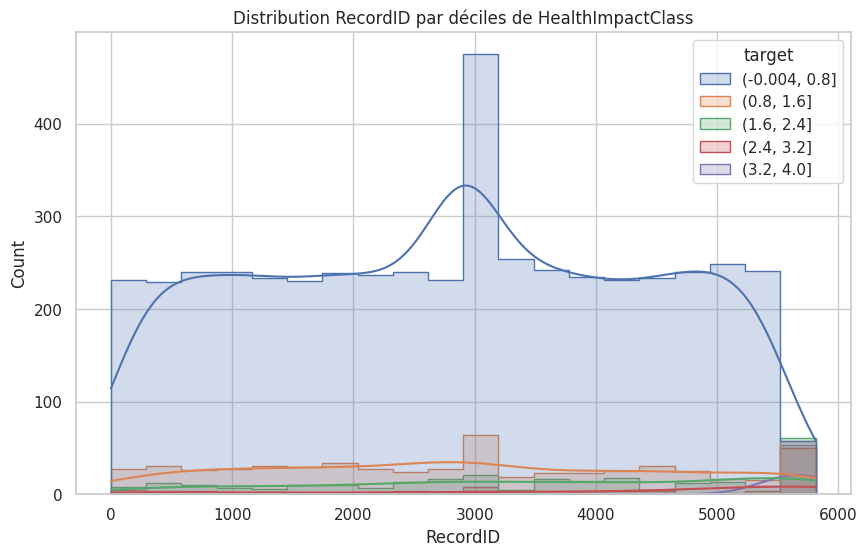

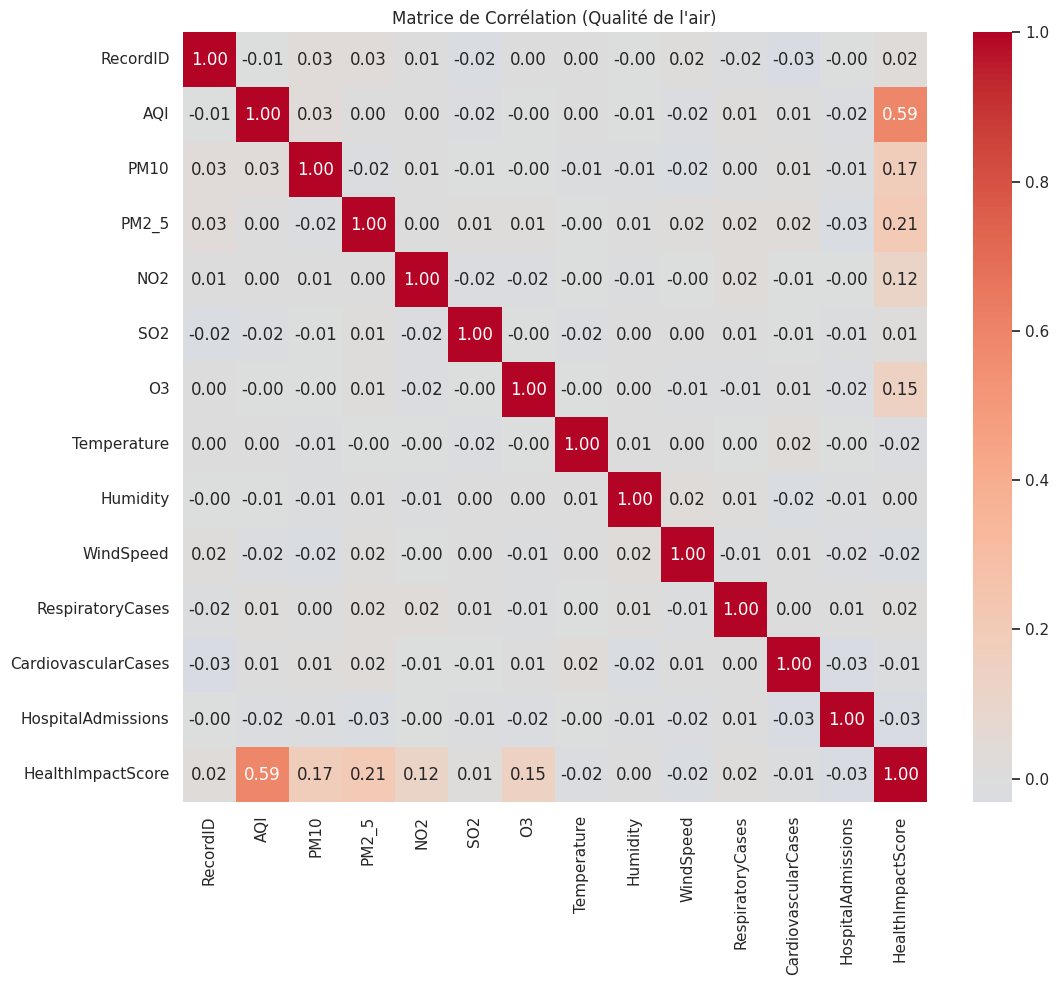

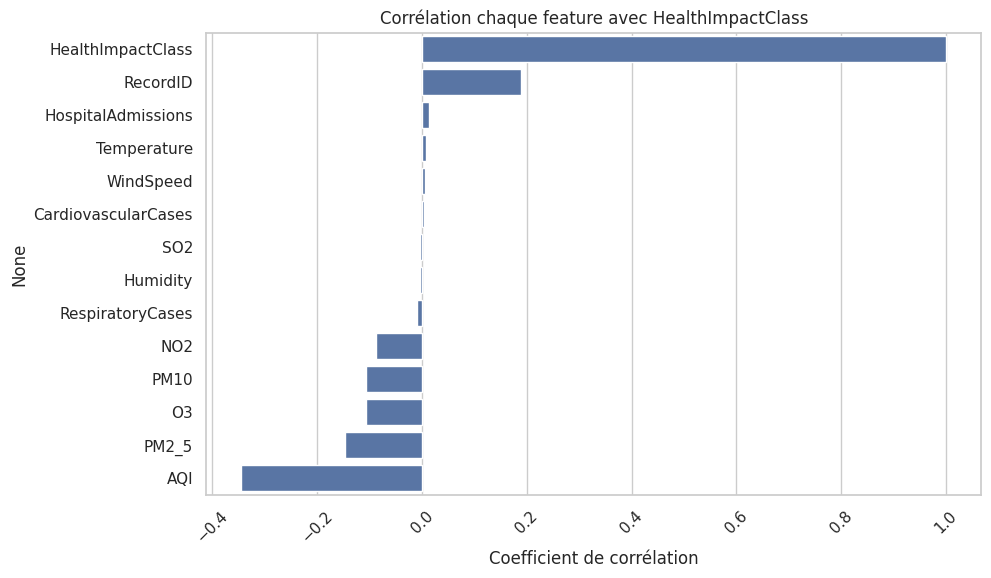

6. Séparation effectuée :
   Entraînement : 4648 échantillons
   Test        : 1163 échantillons

7. Entraînement du modèle (Random Forest Regressor)...

   Modèle entraîné avec succès.

8. Évaluation des performances...

   >>> Mean Squared Error (MSE)      : 0.1701
   >>> Root Mean Squared Error (RMSE): 0.4124
   >>> R-squared (R²) Score          : 0.6827



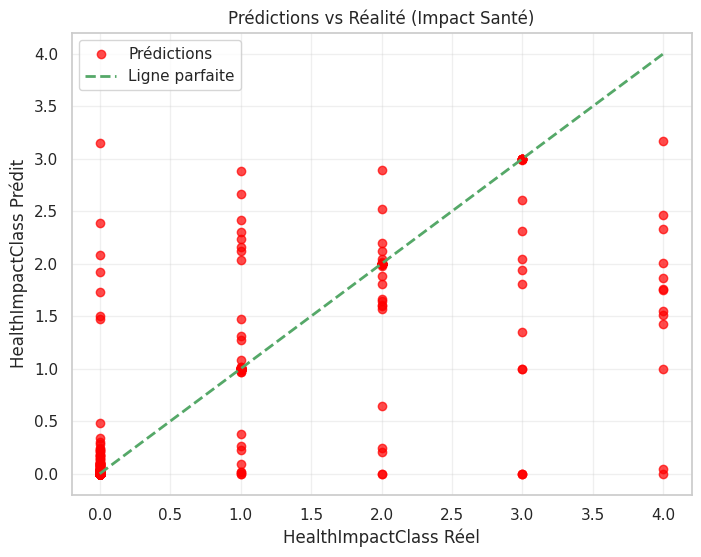


--- FIN DU SCRIPT ---


In [1]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE - AIR QUALITY)
# Auteur : Votre Professeur IA
# Dataset : air_quality_health_impact_data.csv
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
dataset_path = "/content/drive/MyDrive/préparation examen/24020389_KIHEL HAJAR_CC2/air_quality_health_impact_data.csv"

try:
    df = pd.read_csv(dataset_path)
    print(f"2. Données chargées avec succès. Taille du dataset : {df.shape}")
except FileNotFoundError:
    print("ERREUR : Fichier non trouvé. Vérifiez le chemin.")
    exit()

# Affichage des premières infos
print(f"   Colonnes : {list(df.columns)}")
print(f"   Target potentiel : {df.columns[-1]} (assumé comme variable cible)\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES"
# ------------------------------------------------------------------------------
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42)
df_dirty = df.copy()
features_columns = df.columns[:-1]  # Toutes les colonnes sauf la dernière (target)

for col in features_columns:
    if df[col].dtype in ['float64', 'int64']:  # Seulement sur variables numériques
        df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...\n")

target_column = df.columns[-1]  # Dernière colonne comme target
X = df_dirty.drop(target_column, axis=1)
y = df_dirty[target_column]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE (EDA)
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...\n")

print("   Statistiques descriptives (5 premières features) :")
print(X_clean.iloc[:, :5].describe(), "\n")

# Distribution de la première feature numérique par déciles de target
plt.figure(figsize=(10, 6))
first_feature = X_clean.columns[0]
df_for_plot = pd.concat([X_clean[first_feature], y], axis=1)
df_for_plot.columns = [first_feature, 'target']
sns.histplot(data=df_for_plot, x=first_feature, hue=pd.cut(df_for_plot['target'], bins=5),
             kde=True, element='step')
plt.title(f"Distribution {first_feature} par déciles de {target_column}")
plt.show()

# Heatmap corrélation (features sélectionnées)
plt.figure(figsize=(12, 10))
correlation_matrix = X_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Matrice de Corrélation (Qualité de l'air)")
plt.show()

# Corrélation features vs target
plt.figure(figsize=(10, 6))
correlations = pd.concat([X_clean, y], axis=1).corr()[target_column].sort_values(ascending=False)
sns.barplot(x=correlations.values[:-1], y=correlations.index[:-1])
plt.title(f"Corrélation chaque feature avec {target_column}")
plt.xlabel("Coefficient de corrélation")
plt.xticks(rotation=45)
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION TRAIN/TEST
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

print("6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test        : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (RÉGRESSION)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Regressor)...\n")

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION (RÉGRESSION)
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...\n")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"   >>> Mean Squared Error (MSE)      : {mse:.4f}")
print(f"   >>> Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"   >>> R-squared (R²) Score          : {r2:.4f}\n")

# Visualisation prédictions vs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2, label='Ligne parfaite')
plt.xlabel(f"{target_column} Réel")
plt.ylabel(f"{target_column} Prédit")
plt.title("Prédictions vs Réalité (Impact Santé)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n--- FIN DU SCRIPT ---")